## Chatbots With Langgraph

In [1]:
!pip install langgraph langsmith

In [2]:
!pip install langchain langchain_groq langchain_community

In [3]:
from google.colab import userdata
groq_api_key=userdata.get('GROQ_API_KEY')
langsmith=userdata.get('LANGSMITH_API_KEY')
print(langsmith)

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


In [4]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

In [5]:
from langchain_groq import ChatGroq

In [6]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7ce3e3755d50>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7ce3e3a82890>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Start Building Chatbot Using Langgraph

In [7]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END #state graph is used to manage state of chatbot
from langgraph.graph.message import add_messages

In [8]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [9]:
graph_builder

In [10]:
def chatbot(state:State): #this function is a node
  return {"messages":llm.invoke(state['messages'])} #getting first message from messages and after getting response to that query append that response to messages

In [11]:
graph_builder.add_node("chatbot",chatbot)

In [12]:
graph_builder

In [13]:
graph_builder.add_edge(START,"chatbot") #start process after receiving user query
graph_builder.add_edge("chatbot",END) #end after giving output

In [14]:
graph=graph_builder.compile()

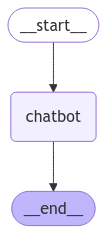

In [15]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [16]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("GoodBye!")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print("Assistant:",value["messages"].content) # content from llm message in string format

User: Hi
dict_values([{'messages': AIMessage(content='Hi there! 👋  \n\nWhat can I do for you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 11, 'total_tokens': 29, 'completion_time': 0.032727273, 'prompt_time': 0.001907607, 'queue_time': 0.23290772199999998, 'total_time': 0.03463488}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-a0a11c5c-6dc5-4cc5-85c8-52065512f428-0', usage_metadata={'input_tokens': 11, 'output_tokens': 18, 'total_tokens': 29})}])
content='Hi there! 👋  \n\nWhat can I do for you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 11, 'total_tokens': 29, 'completion_time': 0.032727273, 'prompt_time': 0.001907607, 'queue_time': 0.23290772199999998, 'total_time': 0.03463488}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprob